# Hausarbeit "Ausgewählte Fragen der medizinischen Informatik"

## Einleitung

Dieses Notebook beschäftigt sich mit der Klassifikationsproblematik bei Brustkrebs.
Hierzu wurde folgender Datensatz verwendet:
https://www.kaggle.com/datasets/mrugrajkumpavat/breast-cancer-classification-by-machine-learning

Dieser beinhaltet sowohl die Diagnose als auch die jeweiligen Eigenschaften des Tumors wie Größe, Textur etc. in verschiedenen Ausprägungen.

Ziel ist es, mithilfe von Pycaret ein Machine-Learning-Verfahren zu finden, welches mit hoher Präzision anhand der Merkmale eines Tumors die Gutartigkeit bzw. Bösartigkeit des Tumors vorhersagen kann. 

## Setup

Bevor Pycaret sowie die abhängigen Bibliotheken verwendet werden können, müssen diese installiert bzw. bereitgestellt werden:

In [1]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 --use-deprecated=legacy-resolver -qq

     |████████████████████████████████| 62 kB 677 kB/s 
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you'll have markupsafe 2.0.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you'll have requests 2.28.1 which is incompatible.
en-core-web-sm 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you'll have spacy 2.3.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


(Fehlermeldungen beim "!pip-install" bitte ignorieren... die entsprechenden Bibliotheken liefen bisher trotzdem immer...)

### Imports

Anschließend können die entsprechenden Module importiert werden:

In [2]:
import pandas as pd
import numpy as np
import pycaret

### Laden der Daten

Um die Daten den Bibliotheken verfügbar zu machen, werden diese in ein Dataframe geladen. Der von Kaggle bezogene  Datensatz wird hierbei als CSV-Datei von einem Github-Repository bezogen.

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/phillip-hsh/hsh_machine_learning_22/main/breast_cancer.csv")

Um einen Überblick zu erhalten, können die ersten 5 Zeilen des Datensatzes angezeigt werden:

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Die Daten sind insgesamt in 32 Spalten aufgeteilt. 
Es ist ersichtlich, dass in fast allen Spalten numerische bzw. Fließkommazahlen aufzufinden sind.
In der Spalte "diagnosis" liegt die Zielvariable vor. Diese weist die Ausprägungen M (maligne) oder B (benigne) auf.

In [5]:
df.shape

(569, 32)

Es liegen insgesamt 569 Datenzeilen vor.

### Vorbereiten der Daten

Die id-Spalte des Datensatzes kann entfernt werden. Diese ist für den Datensatz nicht relevant und kann im Zweifel fälschlicherweise als Feature interpretiert werden.

In [6]:
df = df.drop(columns=['id'])

Aufteilen der Daten. 5% werden komplett zurückgehalten, der Rest wird in Pycaret verwendet.

In [7]:
data = df.sample(frac=0.95, random_state=442)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Daten zum Modellieren: ' + str(data.shape))
print('Ungesehene Daten für Vorhersagen: ' + str(data_unseen.shape))

Daten zum Modellieren: (541, 31)
Ungesehene Daten für Vorhersagen: (28, 31)


Import des Pycaret Klassifikationsmoduls:

In [8]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Durchführen des Setups, die Zielvariable ist weiterhin "diagnosis".

In [9]:
#exp_clf101 = setup(data = data, target = 'status', session_id=123, fix_imbalance = True) 
#exp_clf101 = setup(data = data, target = 'diagnosis', fix_imbalance = True) 
exp_clf101 = setup(data = data, target = 'diagnosis') 

,Description,Value
0,session_id,8208
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,"B: 0, M: 1"
4,Original Data,"(541, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Diese Ausgabe zeigt eine Zusammenfassung der aktuell gewählten Einstellungen an.
Zu sehen ist, dass eine Binärklassifikation vorzunehmen ist (Target-Type). Die entsprechenden Label B und M werden kodiert. Die restlichen Einstellungen sind in diesem Fall nicht weiter angepasst worden.
Auch ist der zu betrachtende Datensatz nicht unbalanciert. Dementsprechend muss hier keine Anpassung vorgenommen werden. 

## Modellvergleich

Mithilfe von Pycaret können nun die gängigsten Machine-Learning-Verfahren durchgerechnet und auf Basis der Ergebnisse verglichen werden.
Hierbei wird, sofern kein anderer Parameter übergeben wird, eine 10-Fold Cross-Validation durchgeführt.

In [10]:
best_model = compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9763,0.9929,0.9438,0.9938,0.9658,0.9479,0.9509,0.131
gbc,Gradient Boosting Classifier,0.9578,0.9832,0.9371,0.9553,0.9442,0.9102,0.9125,0.263
lightgbm,Light Gradient Boosting Machine,0.9524,0.9866,0.9310,0.9464,0.9365,0.8985,0.9012,0.116
rf,Random Forest Classifier,0.9552,0.9853,0.9305,0.9507,0.9398,0.9041,0.9051,0.670
et,Extra Trees Classifier,0.9657,0.9901,0.9305,0.9779,0.9526,0.9258,0.9277,0.462
qda,Quadratic Discriminant Analysis,0.9391,0.9799,0.9233,0.9193,0.9200,0.8709,0.8725,0.017
dt,Decision Tree Classifier,0.9021,0.9004,0.8952,0.8614,0.8754,0.7948,0.7987,0.029
lr,Logistic Regression,0.9393,0.9869,0.8943,0.9449,0.9150,0.8680,0.8731,1.068
nb,Naive Bayes,0.9286,0.9831,0.8819,0.9303,0.9036,0.8470,0.8497,0.025
ridge,Ridge Classifier,0.9550,0.0000,0.8814,1.0000,0.9355,0.9014,0.9071,0.040


Bei der Brustkrebs-Erkennung liegt also eine Recall-orientierte Fragestellung vor, weswegen die Sortierung angepasst wurde. Es ist bei einer solchen Fragestellung vermutlich wichtiger, alle Tumoren zu erkennen und ggf. einige falsch positive zu tolerieren. 
Diese können dann durch weitere Untersuchungen wieder ausgeschlossen werden.

In diesem Beispiel eignet sich somit der Ada Boost Classifier, da dieser neben einer hohen Accuracy einen hohen Recall bietet. Dies scheint jedoch stark von dem vorher per Zufall gewählten Trainingsdatensätzen abzuhängen. 
Bei verschiedenen Testreihen haben sich die Quadratic Discriminant Analysis, der Extra Trees Classifier, die Logistic Regression und eben der Ada Boost Classifier mit sehr guten Leistungen präsentiert. Der Ada Boost Classifier hat jedoch im Mittel ewas bessere Ergebnisse geliefert.

Der Dummy-Classifier, welcher die Inputs ignoriert, liegt insgesamt bei einer Accuracy von nur etwa 62% und damit deutlich hinter bspw. dem SVM - Linear Kernel, welcher mit einer Accuracy von 82,7% immer noch nicht schlecht performt, in dieser Vergleichsliste aber abgeschlagen auf dem vorletzten Platz liegt.
Würden Klassifikationsalgorithmen hinter dem Dummy-Classifier liegen, erzielt reines Raten bessere Ergebnisse als der entsprechende Algorithmus. Dieser wäre dann entsprechend unbrauchbar.

Für den Ada Boost Classifier wird im Folgenden das Modell erstellt.

### Modell erzeugen

Das entsprechende Modell wird erzeugt und in einer Objektvariable gespeichert:

In [11]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9737,0.9913,0.9333,1.0000,0.9655,0.9443,0.9458
2,0.9737,1.0000,1.0000,0.9375,0.9677,0.9456,0.9470
3,0.9737,1.0000,0.9333,1.0000,0.9655,0.9443,0.9458
4,0.8947,0.9673,0.7143,1.0000,0.8333,0.7595,0.7825
5,0.9737,0.9821,0.9286,1.0000,0.9630,0.9426,0.9442
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9737,0.9881,0.9286,1.0000,0.9630,0.9426,0.9442
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Diese Modell kann mit relativ wenig Aufwand zusätzlich optimiert werden. Da ein hoher Recall wünschenswert ist, kann das Modell in dieser Richtung automatisch optimiert werden, wenn der Recall als Parameter mitgegeben wird:

In [12]:
tuned_ada = tune_model(ada, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9884,0.9333,0.9333,0.9333,0.8899,0.8899
1,0.9474,0.9971,0.8667,1.0000,0.9286,0.8872,0.8929
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8947,0.9725,0.8000,0.9231,0.8571,0.7745,0.7795
4,0.8684,0.8958,0.7857,0.8462,0.8148,0.7130,0.7142
5,0.8947,0.9792,0.8571,0.8571,0.8571,0.7738,0.7738
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9737,0.9762,0.9286,1.0000,0.9630,0.9426,0.9442
8,0.9189,0.9876,0.9286,0.8667,0.8966,0.8300,0.8314


Hierbei fällt auf, dass sich fast alle Werte verschlechtert haben. Nach der Durchführung der 10-Fold Cross Validation sind die Werte für Accuracy, Area under Curve, Recall und Precision um jeweils cira 3-4 % gesunken. 

Es wird mit dem ungetunten Modell weiter evaluiert.

### Modell evaluieren

Mithilfe von evaluate_model bzw. plot_model können einige Meta-Daten über das Modell betrachtet werden. Hierbei seien die Confusion Matrix und die Feature Importance genannt, auf welche im Folgenden eingegangen wird.

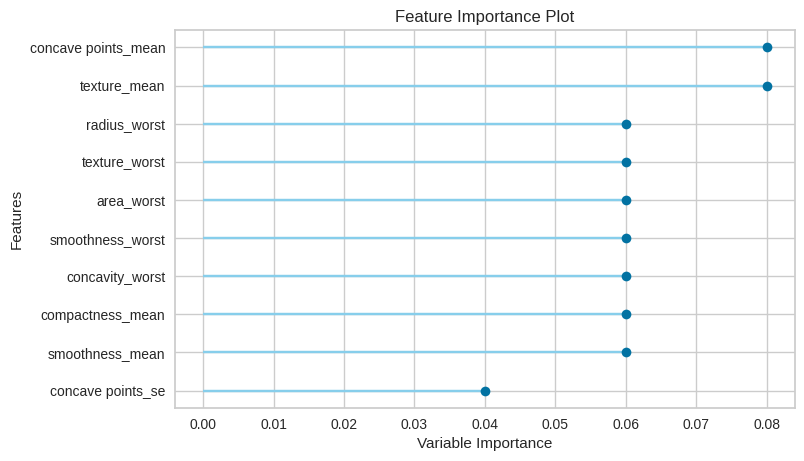

In [23]:
plot_model(ada, plot='feature')

Für den gewählten Algorithmus haben nicht alle Features die gleiche Gewichtung, um die Klassifizierung zu ermitteln.
Für den "Ada Boost Classifier" ist die "durchschnittliche" Textur des Tumors bspw. wichtiger als der größte Durchmesser.


In [24]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Im Folgenden sind die beiden Confusion-Matrizen für das "Ada Boost Classifier" abgebildet. Die erste Matrix bezieht sich auf das ursprüngliche Modell ohne Tuning:

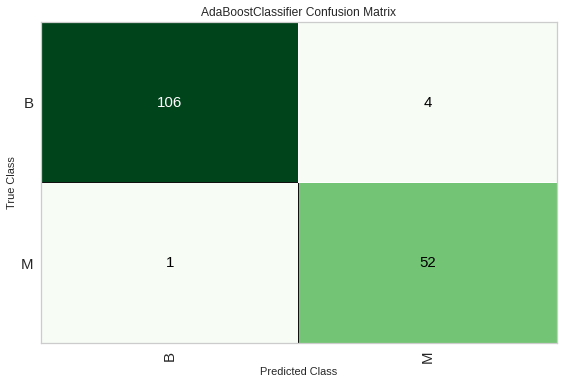

In [25]:
plot_model(ada, plot = 'confusion_matrix')

Es folgt die Matrix mit dem Modell und dem entsprechenden Tuning:

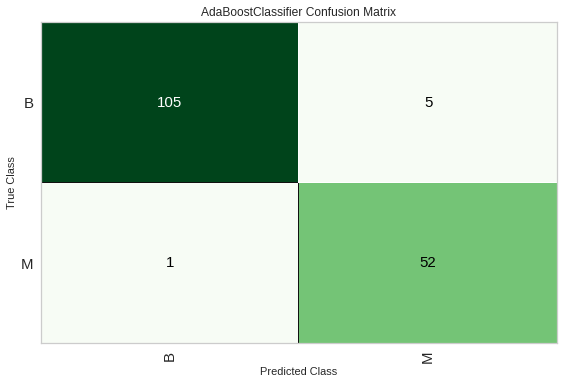

In [16]:
plot_model(tuned_ada, plot = 'confusion_matrix')

In den Modellen werden 105 bzw. 106 gutartige Veränderungen (benigne Tumoren) auch als solche klassifiziert.

Das Tuning-Modell erkennt, genau wie das "Standard"-Modell nur einen bösartigen Tumor nicht (false negative). Maligne Tumoren wurden also nur in einem Fall als gutartig klassifiziert. 
Das Tuning-Modell erkennt mit fünf "false-positives" einen Fall mehr falsch als das Standard-Modell.

Insgesamt liegt der Classifier jedoch häufig richtig.
Ideal wäre jedoch, wenn alle malignen Tumoren als solche erkannt würden. Ein dadurch entstehender höherer Anteil an "false-positives" wäre im Rahmen einer solchen Brustkrebs-Erkennung sicher vertretbar, da diese im Nachgang bspw. im Rahmen der Diagnostik wieder ausgeschlossen werden können.

### Modell Analyse

Das Modell ist soweit fertiggestellt. Nun kann überprüft werden, wie die Performance des erzeugten Modells bei den 30% Testdaten ausfällt. Diese sind bereits im Setup per default ausgekoppelt worden.

In [27]:
predict_model(ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9693,0.9981,0.9811,0.9286,0.9541,0.9311,0.9319


,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Label,Score
0,20.860001,137.800003,1308.000000,0.10460,0.17390,0.208500,0.132200,0.2127,0.06251,0.6986,...,1809.000000,0.1268,0.31350,0.443300,0.21480,0.3077,0.07569,M,M,0.6627
1,17.930000,76.089996,446.000000,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,0.2335,...,523.400024,0.1013,0.07390,0.007732,0.02796,0.2171,0.07037,B,B,0.6355
2,16.950001,85.480003,552.400024,0.07937,0.05696,0.021810,0.014730,0.1650,0.05701,0.1584,...,663.500000,0.1213,0.16760,0.136400,0.06987,0.2741,0.07582,B,B,0.6409
3,21.870001,182.100006,2250.000000,0.10940,0.19140,0.287100,0.187800,0.1800,0.05770,0.8361,...,3216.000000,0.1472,0.40340,0.534000,0.26880,0.2856,0.08082,M,M,0.6780
4,16.680000,98.779999,716.599976,0.08876,0.09588,0.075500,0.040790,0.1594,0.05986,0.2711,...,989.500000,0.1491,0.33310,0.332700,0.12520,0.3415,0.09740,M,B,0.5260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,27.809999,134.399994,1319.000000,0.09159,0.10740,0.155400,0.083400,0.1448,0.05592,0.5240,...,1872.000000,0.1223,0.27610,0.414600,0.15630,0.2437,0.08328,M,M,0.6462
159,13.430000,43.790001,143.500000,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,0.2241,...,185.199997,0.1584,0.12020,0.000000,0.00000,0.2932,0.09382,B,B,0.6866
160,26.600000,126.199997,1138.000000,0.10200,0.14530,0.192100,0.096640,0.1902,0.06220,0.6361,...,1724.000000,0.1782,0.38410,0.575400,0.18720,0.3258,0.09720,M,M,0.6957
161,15.150000,88.269997,580.599976,0.08268,0.07548,0.042490,0.024710,0.1792,0.05897,0.1402,...,657.000000,0.1275,0.31040,0.256900,0.10540,0.3387,0.09638,B,B,0.7235


Insgesamt reichen diese Ergebnisse sehr nah an die Werte des Training-Datensatzes heran. Insgesamt ist dies ein durchaus positives Ergebnis. Ein Overfitting auf den Trainigsdatensatz kann durch die Performance auf dem Testdatendatensatz auf den ersten Blick nicht erkannt werden.

Außerdem kann das Modell auf die 5% der ungesehenen Daten angewendet werden, die zu Beginn nicht Teil des 95% Samples waren.

In [28]:
unseen_predictions = predict_model(ada, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0,1.0,0,0,0,0,0


In [29]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['diagnosis'], unseen_predictions['Label'], metric = 'Accuracy')

0.9643

Tatsächlich scheint das Modell 96,4% aller ungesehenen Datensätze richtig zu klassifizieren.
Insgesamt stellt dies ein positives Ergebnis für den Ada Boost Classifier dar.

Die Vorhersagen der ungesehenen Datensätze können ebenfalls noch ausgegeben werden:

In [30]:
unseen_predictions

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label,Score
0,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,M,0.5301
1,M,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.094980,0.1582,...,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615,M,0.6958
2,M,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.075930,0.1853,...,161.40,1813.0,0.15090,0.65900,0.60910,0.17850,0.3672,0.11230,M,0.6879
3,B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,...,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026,B,0.6860
4,M,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.090290,0.1953,...,114.60,925.1,0.16480,0.34160,0.30240,0.16140,0.3321,0.08911,M,0.6017
5,M,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.074830,0.1717,...,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828,M,0.5573
6,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.086830,0.2095,...,156.10,1750.0,0.11900,0.35390,0.40980,0.15730,0.3689,0.08368,M,0.6812
7,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.201200,0.2655,...,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009,M,0.6416
8,M,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.059430,0.1861,...,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158,M,0.5714
9,M,15.700,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.051890,0.1618,...,129.30,1269.0,0.14140,0.35470,0.29020,0.15410,0.3437,0.08631,M,0.6222


### Finalisieren des Modells

Das erzeugte Modell kann nun im letzten Schritt finalisiert und gespeichert werden:

In [21]:
final_ada = finalize_model(ada)

print(final_ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.4,
                   n_estimators=10, random_state=8208)


In [31]:
save_model(final_ada,'final_tuned_ada 20220712_7')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('dummy', Dummify(target='diagnosis')),
                 ('fix_perfect', Remove_100(target='diagnosis')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
              

## Fazit

Der Ada Boost Classifier eignet sich, um mit hoher Präzision anhand der Merkmale eines Tumors wie Größe, Textur etc. die Gutartigkeit bzw. Bösartigkeit des Tumors vorherzusagen. 
Auf ungesehene Daten erreicht das getunte Modell eine Accuracy von 96,4%.

Mit weiteren Optimierungen können hier ggf. auch die letzten falsch-negativen Brustkrebserkrankungen vermieden und damit alle malignen Tumoren erkannt werden. Die hieraus resultierende höhere Rate an Falsch-Positiven kann in Kauf genommen werden, wenn eine anschließende Diagnostik stattfindet.
Dies bedarf weiterer Auseinandersetzung mit dem Datensatz bzw. den entsprechenden Algorithmen.

Tatsächlich haben fast alle Algorithmen im Pycaret-Vergleich gute bis sehr gute Ergebisse erzielt. Welcher Algorithmus im Vergleich vorne lag, war in den durchgeführten Tests stark abhängig von den zufällig ausgewählten Trainingsdatensätzen. Algorithmen wie die Quadratic Discriminant Analysis, der Extra Trees Classifier, die Logistic Regression bezogen auf Recall oder Accuracy haben teilweise bessere Leistungen erzielt als der Ada Boost Classifier. 
Im Mittel war die Performance des Ada Boost Classifier, insbesondere bezogen auf den Recall, in Kombination mit der Accuracy höher.

Hier ist ggf. weitere systematische Forschung dahingehend notwendig, ob sich mit den anderen Algorithmen evtl. sogar höhere Leistungen erzielen lassen, wenn diese entsprechend optimiert werden.